# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

**Who (Audience):**
- Business stakeholders (executives, product managers, marketing teams) who need insights into customer retention.
- Customer success and retention teams looking to improve engagement strategies.  
  
**What (Message/Purpose):**
- Identify key drivers of customer churn (age, number of products, account balance).
- Highlight customer segments most at risk of churning.
- Provide actionable insights to reduce churn, such as targeted marketing campaigns or service improvements.  
  
**How (Visualization and Storytelling):**
- Churn distribution (bar chart) to show overall churn percentage.
- Age vs. churn rate (box plot) to reveal age-related trends.

# 3. Homework - work with your own data

In [5]:
#!pip install kagglehub
import kagglehub
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

#### 1. Pre-processing

In [6]:
# Download the dataset from Kaggle
dataset_path = kagglehub.dataset_download("shubhammeshram579/bank-customer-churn-prediction")

dataset_path_to_file = os.path.join(dataset_path, "Churn_Modelling.csv")

df = pd.read_csv(dataset_path_to_file)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [7]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


- The dataset consists of 10002 rows and 14 columns.
- Three columns are categorical (Geography, Gender, Surname), while the rest are numerical.
- Numerical columns include customer-related attributes such as Age, CreditScore, and Balance.

In [8]:
# Check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# Display only missing values
df[df.isnull().any(axis=1)].head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


4 columns contain missing values:
- Geography: 1 missing
- Age: 1 missing
- HasCrCard: 1 missing
- IsActiveMember: 1 missing  
  
Handling Missing Values:
- The missing values were dropped entirely, as they accounted for only 4 rows.
- An alternative approach could have been filling Age with the median, but the missing values for HasCrCard and IsActiveMember were unclear in terms of imputation.

In [10]:
# Remove missing rows
df = df.dropna()

In [11]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(2)

In [12]:
# Remove duplicate rows
df = df.drop_duplicates()

- The dataset contains 2 duplicate rows, which were removed.
- CustomerId should be unique for each customer. Checking this column for duplicates revealed that all values are unique.
- Categorical columns like Surname may have duplicates, but this is expected.

In [13]:
# Convert float binary columns to integer
df["Age"] = df["Age"].astype(int)
df["HasCrCard"] = df["HasCrCard"].astype(int)
df["IsActiveMember"] = df["IsActiveMember"].astype(int)

In [14]:
# Convert categorical features to numeric
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [15]:
df.dtypes

RowNumber              int64
CustomerId             int64
Surname               object
CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
Gender_Male             bool
dtype: object

In [16]:
# Convert all boolean columns to integer format
bool_cols = df.select_dtypes(include=["bool"]).columns
df[bool_cols] = df[bool_cols].astype(int)

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,6,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1


#### 2. Exploratory Data Analysis

In [18]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,9996.000000,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.00000,9996.000000,9996.000000
mean,5002.497899,1.569095e+07,650.503301,38.920968,5.013305,76476.263216,1.530212,0.705482,0.514906,100106.701248,0.203782,0.25100,0.247699,0.545618
std,2885.744618,7.192840e+04,96.624668,10.488439,2.892353,62397.118820,0.581684,0.455849,0.499803,57513.314398,0.402829,0.43361,0.431698,0.497940
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.00000,0.000000,0.000000
25%,2503.750000,1.562855e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000,0.00000,0.000000,0.000000
50%,5002.500000,1.569074e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100238.110000,0.000000,0.00000,0.000000,1.000000
75%,7501.250000,1.575323e+07,717.250000,44.000000,7.250000,127639.372500,2.000000,1.000000,1.000000,149400.107500,0.000000,1.00000,0.000000,1.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.00000,1.000000,1.000000


- The describe() function provides insights into distributions, including the minimum, maximum, mean, and percentiles.
- Mean: The average values of numerical columns.
- Median: The middle value of the sorted column.
- Mode: The most frequently occurring value.

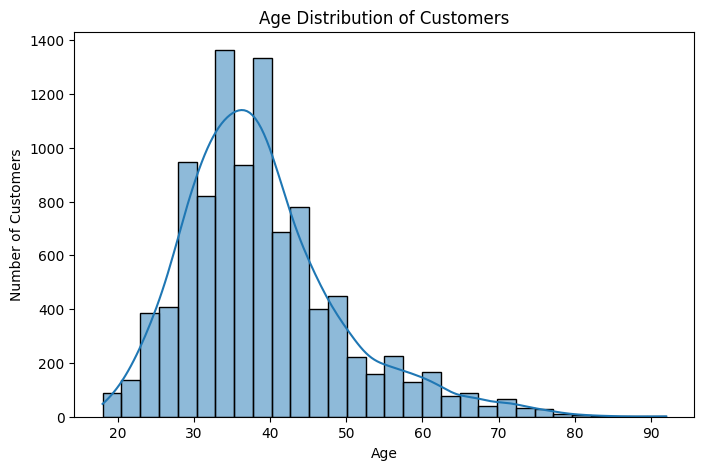

In [19]:
# Age Distribution of Customers

plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Age Distribution of Customers")
plt.show()

The histogram shows that most customers are between 30 and 40 years old, with the distribution being right-skewed. There are fewer younger and older customers, with a small number reaching 80+ years. The presence of a KDE curve suggests a normal-like distribution with a peak around the mid-30s. This insight can help target marketing strategies toward the most common age groups.

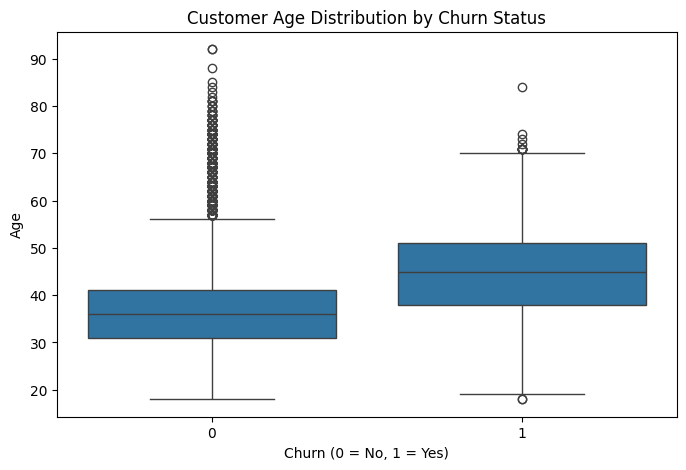

In [20]:
# Relationship Between Age & Churn

plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Customer Age Distribution by Churn Status")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

The boxplot shows that older customers are more likely to churn, with a higher median age among churned customers (~45–50 years) compared to non-churned (~30–40 years). The age distribution is wider for churned customers, indicating more variation. Outliers exist in both groups but do not significantly affect trends. This suggests that retention strategies should focus on older customers.

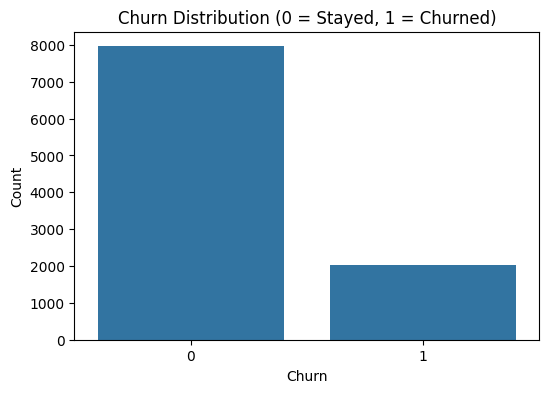

In [21]:
# Countplot for churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Exited"])
plt.title("Churn Distribution (0 = Stayed, 1 = Churned)")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

**Is there any class imbalance?**  
Yes, the Exited column (churn) is highly imbalanced:  
- Stayed (0): ~80%
- Churned (1): ~20%  
  
This suggests that churn prediction models might require balancing techniques to use.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

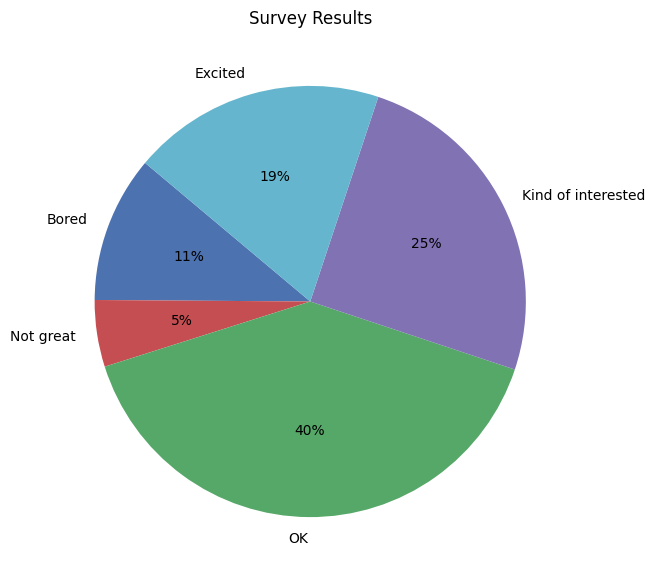

In [22]:
# Data for the survey results
labels = ["Bored", "Not great", "OK", "Kind of interested", "Excited"]
sizes = [11, 5, 40, 25, 19]
colors = ["#4c72b0", "#c44e52", "#55a868", "#8172b3", "#64b5cd"]

# Create a pie chart
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(sizes, labels=labels, autopct='%1.0f%%', colors=colors, startangle=140)
ax.set_title("Survey Results")
plt.show()
